**US Hospital Beds Capacity (for covid-19)**

As a result of the covid-19 outbreak, there has been a baseline for understanding the typical hospitals beds capacity globally.
Dataset consists of historical data of pre-pandemic period and doesn’t represent the current reality which may have changed due to the spikes in demand.
This dataset has been generated in collaboration of efforts within CoronaWhy community. Dataset gotten fro Kaggle

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


**Wrangling** - A quick check on the dataset

In [4]:
#Load dataset into the df frame
df = pd.read_csv('usbeds.csv')

In [4]:
#a display of dataset
df

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,US,AK,aleutians east,63.588753,-154.493062,ICU,1000HAB,0.000000,3338,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
1,US,AK,aleutians west,63.588753,-154.493062,ICU,1000HAB,0.000000,5784,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
2,US,AK,anchorage,63.588753,-154.493062,ACUTE,1000HAB,2.182916,298225,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...
3,US,AK,anchorage,63.588753,-154.493062,ICU,1000HAB,0.244782,298225,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
4,US,AK,anchorage,63.588753,-154.493062,OTHER,1000HAB,0.191131,298225,2019,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...
5,US,AK,anchorage,63.588753,-154.493062,PSYCHIATRIC,1000HAB,0.938888,298225,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...
6,US,AK,bethel,63.588753,-154.493062,ICU,1000HAB,2.060478,17957,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...
7,US,AK,bristol bay,63.588753,-154.493062,ICU,1000HAB,0.000000,917,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
8,US,AK,denali,63.588753,-154.493062,ICU,1000HAB,0.000000,2303,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...
9,US,AK,dillingham,63.588753,-154.493062,ICU,1000HAB,2.814636,4974,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...


In [5]:
#A display of data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 12 columns):
country       5713 non-null object
state         5713 non-null object
county        5713 non-null object
lat           5713 non-null float64
lng           5713 non-null float64
type          5713 non-null object
measure       5713 non-null object
beds          5713 non-null float64
population    5713 non-null int64
year          5713 non-null int64
source        5713 non-null object
source_url    5713 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 535.7+ KB


In [6]:
#checking for unique data
df.nunique()

country          1
state           51
county        1850
lat             51
lng             44
type             4
measure          1
beds          4667
population    3099
year             9
source           2
source_url       2
dtype: int64

In [9]:
#Drop country column since US is the only country we analaysing
df.drop(['country'], axis=1, inplace=True)

**Exploratory** - A quick expolre of data set to undersatnd the distribution of data

In [8]:
#State with the most bed spaceb
df['state'].value_counts()[0:11]

TX    476
GA    279
KY    197
NC    195
VA    187
OH    187
MO    182
FL    181
TN    180
KS    174
IN    171
Name: state, dtype: int64

As at when this data set was collected the sate of Taxas has the highest number of beds

In [3]:
#county with the most population
def sort_by_beds(df):
    return df.sort_values(by = 'beds', ascending = False)['county'].head(1)
df.groupby('year').apply(sort_by_beds)

year      
2012  3720             brown
2013  1654            barber
2014  2298          kennebec
2015  1787             scott
2016  3288          cheyenne
2017  2763    st. louis city
2018  1764            pawnee
2019  4658            baylor
2020  1882             floyd
Name: county, dtype: object

In [ ]:
As at when this data was collected most number of beds in a county is the Brown county

In [62]:
#A staictically summary of beds in the US
df['beds'].describe()

count    5713.000000
mean        1.647644
std         3.101818
min         0.000000
25%         0.141784
50%         0.616614
75%         2.225851
max        90.466352
Name: beds, dtype: float64

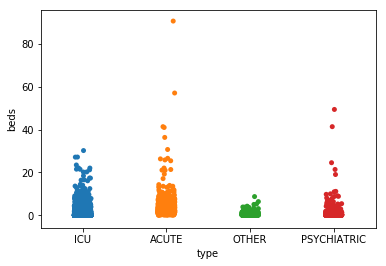

In [5]:
#Code to show relationship between type and beds in seconds
g = sb.stripplot(x=df["type"] , y=df['beds'] , jitter=True )
g.set_xlabel('type')
g.set_ylabel('beds')
plt.show()

* The seaborn plot show Acute beds in US hospitals are the most available

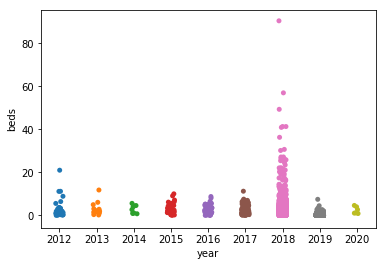

In [7]:
#Code to show relationship between type and beds in seconds
g = sb.stripplot(x=df["year"] , y=df['beds'] , jitter=True )
g.set_xlabel('year')
g.set_ylabel('beds')
plt.show()

* The year 2018 had the most beds created